Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .
</font>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Рассмотрим два варианта проекта без BERT и с BERT**

# Подготовка

## Подключение библиотеки

In [31]:
# Уведомление о завершение работы определенного ячейка (очень пригодится для машинного обучения)
import jupyternotify
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [32]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Для визуализации временных рядов
import plotly.graph_objects
import seaborn as sb
from scipy import stats as st
# Время обучения модели
import timeit
# Тренды и сезонность
from statsmodels.tsa.seasonal import seasonal_decompose
# Проверка на стационарность
from statsmodels.tsa.stattools import adfuller, kpss
# Проверка на дисперсию с помощью теста Андерсона-Дарлинга
from scipy.stats import anderson
# XGBRegressor
import xgboost as xgb

# Работа с текстами
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from lightgbm import LGBMRegressor
# Вызов библиотеки для отключения предупреждения
import warnings

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, TimeSeriesSplit
# Применим кроссвалидацию для повышения качеств обучения



# Масштабируемость модели
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Для машинного обучения разными способами:
# - Логическая регрессия
from sklearn.linear_model import LogisticRegression
# - Случайный лес
from sklearn.ensemble import RandomForestClassifier
# - Решающее дерево
from sklearn.tree import DecisionTreeClassifier
# - Модель на адекватность
from sklearn.dummy import DummyClassifier
# - Бустинг модель
from catboost import CatBoostClassifier

from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve,
    # MSE
    mean_squared_error,
    mean_absolute_error,
    fbeta_score, 
    make_scorer
)

# Контроль выборки
from sklearn.utils import shuffle

# Для лематизации текстов
import re
from pymystem3 import Mystem

# Для машинного обучения - деление выборки на обучающие и валидационные
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Просмотр все значений метрики
from sklearn.metrics import classification_report

from sklearn import svm
import joblib

Для машинного обучения с BERT

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-text

     |████████████████████████████████| 6.0 MB 1.3 MB/s eta 0:00:01
     |███████████████████▌            | 356.5 MB 1.6 MB/s eta 0:02:2043

In [35]:
import os
import shutil
import torch

# Библиотеки для обучения с применением технологий BERT
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from transformers import BertTokenizer
# Чтобы создать AdamW оптимизацию
from official.nlp import optimization  

tf.get_logger().setLevel('ERROR')

ModuleNotFoundError: No module named 'tensorflow_text'

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Хорошо, подправил
</div>

## Загрузим данные

In [10]:
# Получаем датасет
try:
    # С локального файла
    try:
        # Сразу устанавливаем время как индексы
        df = pd.read_csv('toxic_comments.csv', index_col=[0], parse_dates=[0])
    except:
        df = pd.read_csv('/datasets/toxic_comments.csv', index_col=[0], parse_dates=[0])
except:
    print('Отсутствует датасет. Проверьте путь файла')

## Изучим данные

In [12]:
display(df.info(), df.head())

Как и видим, что текст написан на английском языке

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корреткно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> В задачах классификации желательно изучать баланс классов. При этом, необязательно с ним бороться – это поле для экспериментов (качество может как улучшиться, так и ухудшиться).
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Добавил изучение балансы классов, а что по поводу борьбы с этим классом, пожалуйста, подробнее как делать? Имеешь ввиду, что существуют некоторые жаргоны, которые машина не может определить тип класса: позитивный и токсичный?
</div>

### Изучим балансы классов

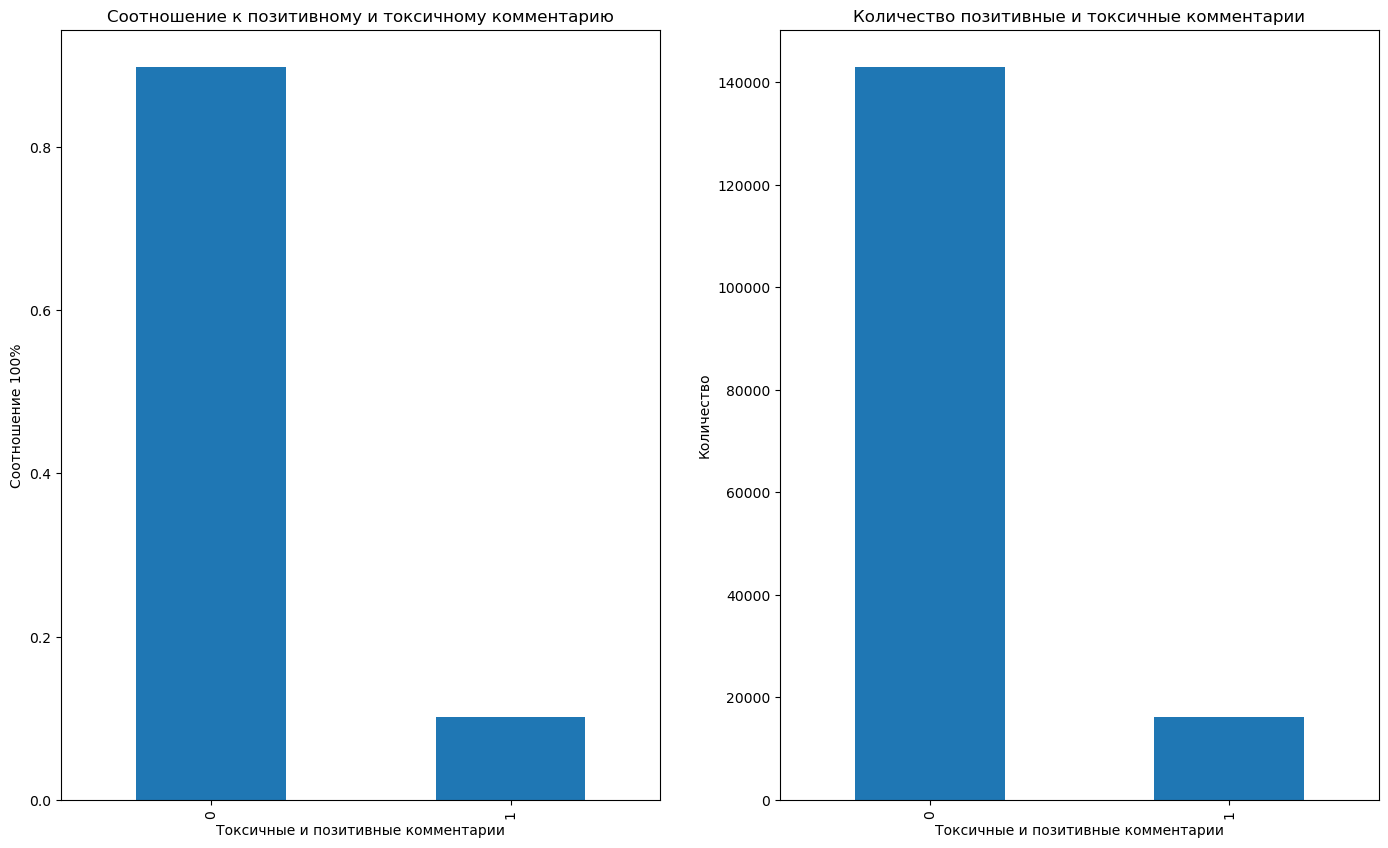

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(17, 10))

df['toxic'].value_counts(normalize=True).plot(ax=axs[0], kind='bar')
axs[0].set_title('Соотношение к позитивному и токсичному комментарию')
axs[0].set_ylabel('Соотношение 100%')
axs[0].set_xlabel('Токсичные и позитивные комментарии')
        
df['toxic'].value_counts().plot(ax=axs[1], kind='bar')
axs[1].set_title('Количество позитивные и токсичные комментарии')
axs[1].set_ylabel('Количество')
axs[1].set_xlabel('Токсичные и позитивные комментарии')

Как и видим, что много токсичных комментариев нежели позитивных. Дальше идем

## Разделим на обучающую и тестовую выборку

In [16]:
# Деление обучающей выборки на признаки и целевые признаки
features = df['text']
target = df['toxic']

In [17]:
# Разделим обучающую и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [18]:
print('Размер обучающей выборки:', round(features_train.shape[0] / df.shape[0], 3), '%')
print('Размер тестовой выборки:', round(features_test.shape[0] / df.shape[0], 3), '%')

## Предобработка данных

In [19]:
# Создаем корпус текстов
corpus_train = list(features_train)
corpus_test = list(features_test)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Приводить тексты к юникоду не имеет смысла, так как они все на английском. Это может привести к падению ядра из-за увеличения объема занимаемой памяти.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Хорошо, подправил
</div>

In [20]:
print('Corpus_train')
display(corpus_train[0])
print()
print('Corpus_test')
display(corpus_test[0])

## Установка стоп-слово

In [54]:
# Получим стоп-слово
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

## Создание корпуса текстов с обучающей и тестовой выборки

### Обучающая выборка

In [55]:
# По аналогии с CountVectorizer() создадим счётчик, указав в нём стоп-слова:
count_tf_idf_train = TfidfVectorizer(stop_words=list(stopwords))

In [56]:
# Чтобы посчитать TF-IDF для корпуса текстов, вызовем функцию fit_transform():
tf_idf_train = count_tf_idf_train.fit_transform(corpus_train) 
# Передав TfidfVectorizer() аргумент ngram_range, можно рассчитать N-граммы.

In [57]:
print("Размер матрицы обучающей выборки:", tf_idf_train.shape)

### Тестовая выборка

In [58]:
# По аналогии с CountVectorizer() создадим счётчик, указав в нём стоп-слова:
count_tf_idf_test = TfidfVectorizer(stop_words=list(stopwords))

In [59]:
# Чтобы посчитать TF-IDF для корпуса текстов, вызовем функцию fit_transform():
tf_idf_test = count_tf_idf_train.transform(corpus_test) 
# Передав TfidfVectorizer() аргумент ngram_range, можно рассчитать N-граммы.

In [60]:
print("Размер матрицы тестовой выборки:", tf_idf_test.shape)

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано верно. Отлично, что векторизатор был обучен только на тренировочной части данных.
</div>

# Машинное обучение

In [61]:
# Здесь будем сохранить результаты машинного обучения
results = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

## Функции

**Создаем функцию, которая упрощает написание кода**

### Обучение модели

In [62]:
# Обучение модели
def fit_model(model, features_train, target_train):
    # Обучим модель на обучающей выборке
    model.fit(features_train, target_train)

    # Узнаем RMSE обучающей выборки
    F1_TRAIN = model.best_score_
    print('F1 TRAIN:', round(F1_TRAIN, 3))
    print('TIME TRAIN [s]:', round(model.refit_time_, 3))
    
    return F1_TRAIN

### Предсказание модели

In [63]:
# Предсказание модели
def predict_model(model, features_test, target_test):
    start_time = timeit.default_timer()
    # Получим предсказания на тестовой выборки
    predictions = model.predict(features_test)

    elapsed = round(timeit.default_timer() - start_time, 3)

    # Узнаем RMSE
    F1_VALID = f1_score(target_test, predictions)
    print('F1 VALID:', round(F1_VALID, 3))
    print('Предсказание:', round(predictions.mean(), 3))
    
    return predictions, elapsed, F1_VALID

### Сохранение результатов

In [64]:
# Зафиксируем результаты
def save_result(name, F1_TRAIN, F1_VALID, predictions, refit_time_, elapsed, best_params_, count_model, show_display=False):
    results[count_model] = pd.Series({
        'NAME': f'{name}', 
        'F1 TRAIN': F1_TRAIN, 
        'F1 VALID': F1_VALID, 
        'PREDICTIONS': predictions.mean(), 
        'TIME TRAINING [s]': refit_time_, 
        'TIME PREDICTION [s]': elapsed, 
        'PARAMETRS': best_params_
    })
    
    if(show_display == True): display(results[count_model])

### График ROC-кривая

In [65]:
def display_aus_roc(model, tf_idf_test, target_test):
    probabilities_test = model.predict_proba(tf_idf_test)
    probabilities_one_test = probabilities_test[:, 1]

    auc_roc = roc_auc_score(target_test, probabilities_one_test)

    # Изображаем ROC-кривую
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

    plt.figure()

    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()
    
    print('ROC AUC:', auc_roc)

### График распределения плотности предсказанных и истинных значений

In [66]:
def display_graph_predicted_and_target(target_train, predictions, F1_VALID, x_pos, y_pos):
    plt.figure(figsize=(10, 5))
    # Целевой признак
    target_train.plot(kind='kde', linewidth=2)
    # Предсказания
    pd.Series(predictions).plot(kind='kde',linewidth=2)
    
    plt.title('График распределения плотности предсказанных и истинных значений')
    plt.legend(['Истинные значения','Предсказанные значения'], fontsize='large')
    
    plt.text(x_pos, y_pos, f'F1= {round(F1_VALID, 3)}')
    plt.xlabel('')
    plt.ylabel('Плотность')
    
    plt.show()

## LogisticRegression

In [67]:
pipe_lr = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('LogisticRegression', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=12345))
])
                   
# Подбор гиперпараметров для обучения
grid_params_lr = [{
    'LogisticRegression__penalty': ['l1', 'l2'],
    'LogisticRegression__C': np.logspace(-3, 3, 10),
    'LogisticRegression__solver': ['liblinear']
}]

model = GridSearchCV(
    estimator=pipe_lr,
    param_grid=grid_params_lr,
    scoring='f1',
    cv=5
) 

In [68]:
%%notify -m 'LogisticRegression'
%%time

F1_TRAIN = fit_model(model, corpus_train, target_train)

<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходит разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>. <a href="https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05">Тут</a> есть пример.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Хорошо, добавил Pipeline
</div>

### Проверка на тестовой выборки

In [69]:
%%time
# Предсказание модели
predictions, elapsed, F1_VALID = predict_model(model, corpus_test, target_test)

In [70]:
# Зафиксируем результаты
save_result('LogisticRegression', F1_TRAIN, F1_VALID, predictions, model.refit_time_, elapsed, model.best_params_, count_model, show_display=True)
count_model+=1

### ROC-кривая

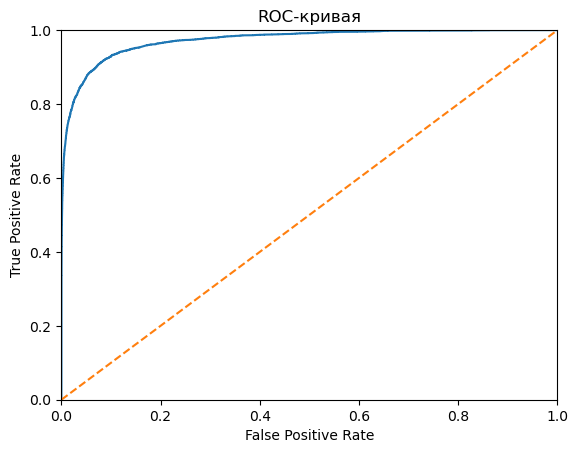

In [71]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC получилось очень идеальной, близок к 1

### График распределения плотности предсказанных и истинных значений

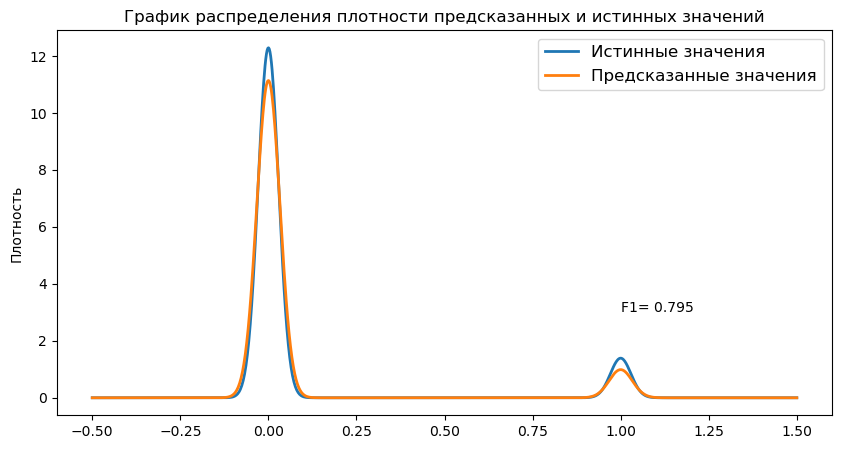

In [72]:
display_graph_predicted_and_target(corpus_train, predictions, F1_VALID, 1, 3)

Результат оказался оптимальным, т.е. F1 = 0,795 

## RandomForestClassifier

In [74]:
pipe_rf = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('RandomForestClassifier', RandomForestClassifier(random_state=12345))
])
                   
# Подбор гиперпараметров для обучения
grid_params_rf = [{
    'RandomForestClassifier__criterion': ['gini', 'entropy'],
    'RandomForestClassifier__max_depth': [5, 20],
    'RandomForestClassifier__min_samples_split': [5, 10],
    'RandomForestClassifier__n_estimators': [10, 20],
    'RandomForestClassifier__max_features': ['sqrt', 'log2'],
    'RandomForestClassifier__bootstrap': [True, False]
}]

model = GridSearchCV(
    estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
) 

In [75]:
%%notify -m 'RandomForestClassifier'
%%time

# Обучение модели
F1_TRAIN = fit_model(model, corpus_train, target_train)

In [76]:
model.best_params_

In [80]:
model

KeyboardInterrupt: 

### Проверка на тестовой выборки

In [77]:
%%time
# Предсказание модели
predictions, elapsed, F1_VALID = predict_model(model, corpus_test, target_test)

In [79]:
# Устанавливаем лучшие гиперпараметры
model.set_params(**model.best_params_)

<div class="alert alert-block alert-danger">

<b>Ошибка:</b> На тестовой выборке нужно измерить только одну – лучшую модель. Сравнение моделей нужно провести только на кросс-валидации `grid.best_score_` (с одним и тем же параметром "cv") или только на валидационной выборке.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Разве GirdSearchCV автоматически сохраняет лучшие гиперпараметры, и что можно сразу провести на тест?
</div>

F1 метрика совсем сильно упала, почти в 100 раз, очень странно получилось, дальше смотрим

In [343]:
# Зафиксируем результаты
save_result('RandomForestClassifier', F1_TRAIN, F1_VALID, predictions, model.refit_time_, elapsed, model.best_params_, count_model, show_display=True)
count_model+=1

### ROC-кривая

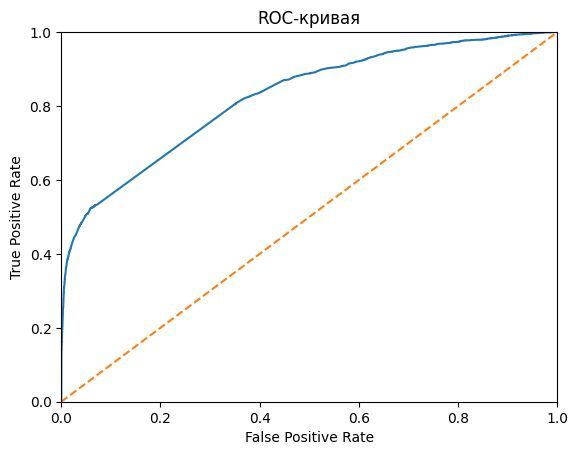

In [345]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC получилось хорошей, около 0,82

### График распределения плотности предсказанных и истинных значений

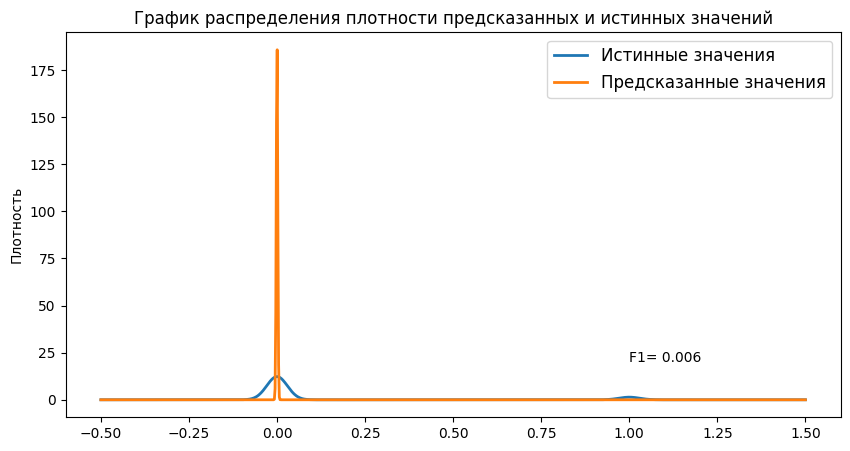

In [346]:
display_graph_predicted_and_target(target_train, predictions, F1_VALID, 1, 20)

Результат у моделей Случайного леса оказался намного худшим по сравнению с остальными моделями

## DecisionTreeClassifier

In [348]:
pipe_dt = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=12345))
])
                   
# Подбор гиперпараметров для обучения
grid_params_dt = [{
    'DecisionTreeClassifier__max_depth': [5, 20],
    'DecisionTreeClassifier__min_samples_leaf': [0.5, 1]
}]

model = GridSearchCV(
    estimator=pipe_dt,
    param_grid=grid_params_dt,
    scoring='f1',
    cv=5,
    n_jobs=-1
) 

In [349]:
%%notify -m 'DecisionTreeClassifier'
%%time

# Обучение модели
F1_TRAIN = fit_model(model, corpus_train, target_train)

### Проверка на тестовой выборки

In [350]:
%%time
# Предсказание модели
predictions, elapsed, F1_VALID = predict_model(model, corpus_test, target_test)

In [351]:
# Зафиксируем результаты
save_result('DecisionTreeClassifier', F1_TRAIN, F1_VALID, predictions, model.refit_time_, elapsed, model.best_params_, count_model, show_display=True)
count_model+=1

### ROC-кривая

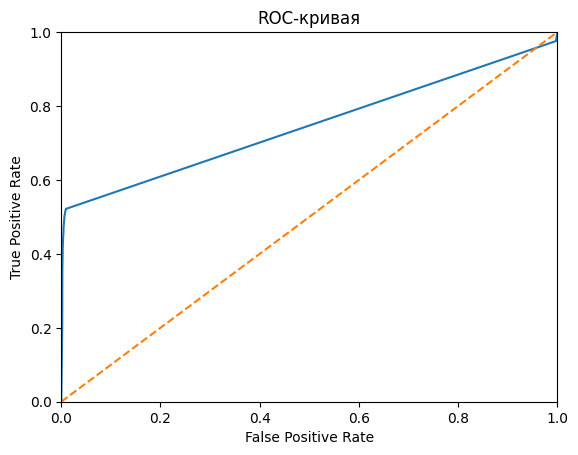

In [352]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC тоже получилось хорошей, около 0,74

### График распределения плотности предсказанных и истинных значений

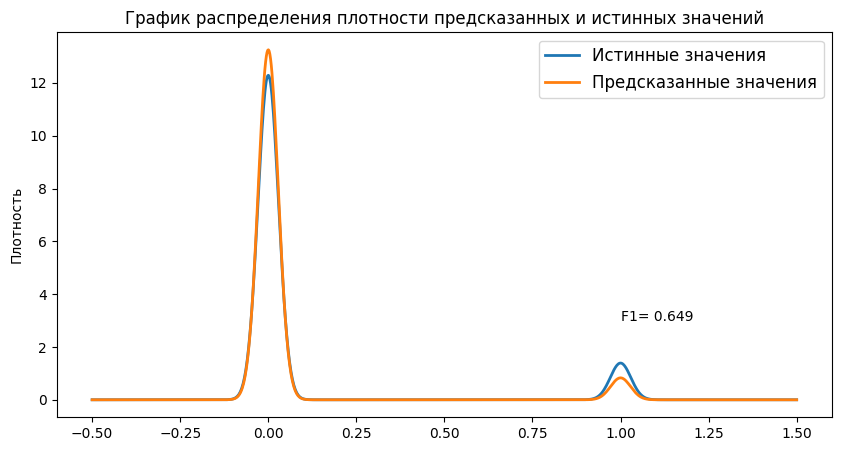

In [353]:
display_graph_predicted_and_target(target_train, predictions, F1_VALID, 1, 3)

Результат у моделей Решающего дерева тоже оказался неплохим, но логическая регрессия лучше

## CatBoostClassifier

In [357]:
pipe_cbc = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('CatBoostClassifier', CatBoostClassifier())
])
                   
# Подбор гиперпараметров для обучения
grid_params_cbc = [{
    'CatBoostClassifier__depth': [5, 10],
    'CatBoostClassifier__learning_rate': [0.01, 0.1],
    'CatBoostClassifier__iterations': [10, 20]
}]

model = GridSearchCV(
    estimator=pipe_cbc,
    param_grid=grid_params_cbc,
    scoring='f1',
    cv=5,
    n_jobs=-1
) 

In [ ]:
%%notify -m 'CatBoostClassifier'
%%time

# Обучение модели
F1_TRAIN = fit_model(model, corpus_train, target_train)

### Проверка на тестовой выборки

In [500]:
%%time
# Предсказание модели
predictions, elapsed, F1_VALID = predict_model(model, tf_idf_test, target_test)

In [501]:
# Зафиксируем результаты
save_result('CatBoostClassifier', F1_TRAIN, F1_VALID, predictions, model.refit_time_, elapsed, model.best_params_, count_model, show_display=True)
count_model+=1

### ROC-кривая

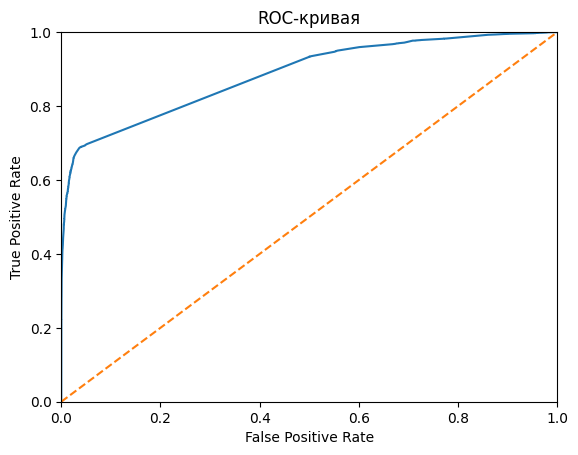

In [502]:
display_aus_roc(model, tf_idf_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC тоже получилось очень хорошей, около 0,88

### График распределения плотности предсказанных и истинных значений

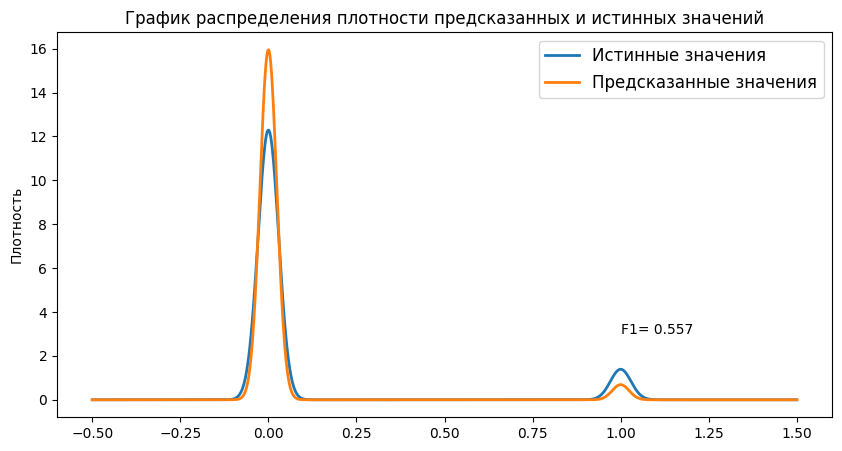

In [503]:
display_graph_predicted_and_target(target_train, predictions, F1_VALID, 1, 3)

Результат у моделей Бустинга тоже оказался неплохим, но все равно логическая регрессия лучше

# Вывод

In [508]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

In [509]:
# Смотрим все результаты обучения
results

In [511]:
# Нам интересует F1 не менее 0.75, тогда
best_results = results[results['F1 VALID'] > 0.75]
best_results

Самой лучшей моделей является LogisticRegression - F1 на тестовой выборки составляет `0.77`, а скорость обучения составляет аж **10 секунды**, время предсказания - **0,01 секунда**. 

Вполне очень акдеватный результат, чтобы выбрать эту модель для реализации. 

Есть другая модель, но, к сожалению, не попал в топ, т.к. метрика F1 ниже заявленного - `0,75`.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге! Но есть ошибка с тестированием, которую я обозначил выше.
</div>

# Машинное обучение с BERT

In [81]:
tf_idf_train.shape[0]

In [82]:
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 

In [83]:
device = torch.device("cuda:1") if torch.cuda.is_available() else torch.device("cpu")

In [84]:
device

In [380]:
%%time
for i in notebook.tqdm(range(tf_idf_train.shape[0] // batch_size)):
        batch = torch.LongTensor(tf_idf_train[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:
features = np.concatenate(embeddings) 

## Получение датасета

In [367]:
# Получаем csv файл через ссылки
toxic_comments_path = tf.keras.utils.get_file("toxic_comments.csv", 'https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [368]:
# Адрес хранения csv файла
toxic_comments_path

In [434]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

toxic_comments_csv_ds = tf.data.experimental.make_csv_dataset(
    'toxic_comments.csv',
    label_name='',
    batch_size=batch_size,
    num_epochs=1,
    ignore_errors=True)

Просмотр текстов

In [435]:
for batch, label in toxic_comments_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
        print('-'*127)
    print('='*127)
    print('')
    print(f"{'label':20s}: {label}")

In [436]:
toxic_comments_csv_ds

##  Деление на обучающей и тестовой выборки

In [437]:
# Разделим обучающую и валидцаионную, тестовую выборку в соотношение 60:40
train, test = train_test_split(df, test_size=0.2, random_state=12345)

In [438]:
print('Размер обучающей выборки:', round(train.shape[0] / df.shape[0], 3), '%')
print('Размер тестовой выборки:', round(test.shape[0] / df.shape[0], 3), '%')

In [439]:
# Cохраняим файлы
train.to_csv(r"toxic_comments_train.csv")
test.to_csv(r"toxic_comments_test.csv")

In [440]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

toxic_comments_csv_ds_train = tf.data.experimental.make_csv_dataset(
    'toxic_comments_train.csv',
    label_name='',
    batch_size=batch_size,
    num_epochs=1,
    ignore_errors=True)

toxic_comments_csv_ds_test = tf.data.experimental.make_csv_dataset(
    'toxic_comments_test.csv',
    label_name='',
    batch_size=batch_size,
    num_epochs=1,
    ignore_errors=True)

Просмотр текстов обучающей выборки

In [441]:
for batch, label in toxic_comments_csv_ds_train.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
        print('-'*127)
    print('='*127)
    print('')
    print(f"{'label':20s}: {label}")

Просмотр текстов тестовой выборки

In [442]:
for batch, label in toxic_comments_csv_ds_test.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
        print('-'*127)
    print('='*127)
    print('')
    print(f"{'label':20s}: {label}")

## Загрузка моделей с TensorFlow HUB

In [443]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

## Модель предварительной обработки

In [444]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [445]:
corpus_train[0]

In [446]:
text_test = list(corpus_train[0])
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

### Возвращаемые значения

Прежде чем внедрять BERT в вашу собственную модель, нужно сначала взглянуть на ее выходные данные. 

Мы загрузили его из TF Hub, и теперь увидим возвращаемые значения.

In [447]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [448]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

**ЛУЧШИЕ модели** возвращают карту с 3 важными ключами: `pooled_output`, `sequence_output`, `encoder_outputs`:

`pooled_output` представляет каждую входную последовательность в целом. Форма - `[batch_size, H]`. Мы можем рассматривать это как встраивание для всего обзора фильма.

`sequence_output` представляет каждый входной токен в контексте. Форма имеет вид `[batch_size, seq_length, H]`. Мы можем думать об этом как о контекстуальном встраивании для каждого токена в обзоре фильма.

`encoder_outputs` - это промежуточные активации блоков `L`-трансформатора. выходные данные `["encoder_outputs"][i]` - это тензор формы `[batch_size, seq_length, 1024]` с выходами i-го блока преобразования, для `0 <= i < L`. Последнее значение списка равно `sequence_output`.

Для точной настройки мы используем массив `pooled_output`.

### Подбор моделей для машинного обучения

Мы создадим очень простую точно настроенную модель с моделью предварительной обработки, выбранной **НАИЛУЧШЕЙ моделью**, одним плотным слоем и отсеивающимся слоем.

_*Примечание:*_ 
для получения дополнительной информации о вводе и выводе базовой модели мы можем перейти по URL модели для получения документации. 

Конкретно здесь нам не нужно беспокоиться об этом, потому что модель предварительной обработки позаботится об этом за нас.

In [449]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

Проверим, что модель запускается с выводом модели предварительной обработки

In [450]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

Выходные данные бессмысленны, потому что модель еще не была обучена

## Машинное обучение

Теперь у нас есть все компоненты для обучения модели, включая модуль предварительной обработки, кодировщик BERT, данные и классификатор

### Функция потерь

Поскольку это задача двоичной классификации, и модель выдает вероятность (единичный уровень), вы будете использовать функцию потерь `losses.BinaryCrossentropy`.


In [451]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

### Оптимизация

Для точной настройки воспользуемся тем же оптимизатором, с которым изначально обучался БЕРТ: "Адаптивные моменты" (Adam). Этот оптимизатор минимизирует потери при прогнозировании и выполняет регуляризацию путем уменьшения веса (без использования моментов), которая также известна как [AdamW](https://arxiv.org/abs/1711.05101 ).

Для скорости обучения (`init_lr`) будем использовать тот же график, что и для предварительной тренировки BERT: линейное уменьшение условной начальной скорости обучения с префиксом линейной фазы разминки в течение первых 10% шагов обучения (`num_warmup_steps`). В соответствии с ЛУЧШЕЙ статьей, начальная скорость обучения меньше для точной настройки (лучше всего 5e-5, 3e-5, 2e-5).

In [452]:
epochs = 2
steps_per_epoch = tf.data.experimental.cardinality(toxic_comments_csv_ds_train).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr, num_train_steps=num_train_steps, num_warmup_steps=num_warmup_steps, optimizer_type='adamw')

### Загружаем модель BERT и обучаем ее

Используя `classifier_model`, который мы создали ранее, мы можете скомпилировать модель с потерями, метрикой и оптимизатором.

In [453]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Примечание: время обучения будет варьироваться в зависимости от сложности выбранной вами модели BERT.

In [454]:
print(f'Training model with {tfhub_handle_encoder}')

history = classifier_model.fit(x=toxic_comments_csv_ds, validation_data=val_ds, epochs=epochs)

KeyboardInterrupt: 

<div class="alert alert-block alert-info">

Комментарий студента V1: У меня вопрос к ревью. Я сделал примерно то, что было по образцу с вебинара. Но здесь не указан конец шага, т.е. там вместо числа стоит `Unknown`. Получается, что здесь будет бесконечная итерация
    
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> https://datascience.stackexchange.com/questions/74168/epoch-1-5-wont-stop
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Вообще говоря, лучше использовать torch. Он намного более популярен сейчас. Вот специализированный БЕРТ для него: https://huggingface.co/unitary/toxic-bert
</div>

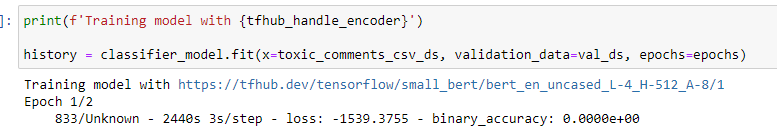

### Оценка моделей

In [455]:
loss, accuracy = classifier_model.evaluate(toxic_comments_csv_ds_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

KeyboardInterrupt: 

<div class="alert alert-block alert-info">

Комментарий студента V1: И здесь аналогично
    
</div>

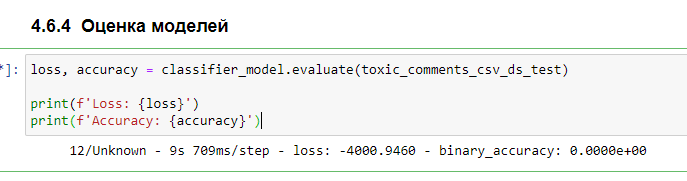

### Построим график точности и потери с течением времени

На основе объекта `History`, возвращаемого `model.fit()`. Вы можете построить график потерь при обучении и валидации для сравнения, а также точности обучения и валидации:

In [456]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

NameError: name 'history' is not defined

## Проверим на F1-метрику

In [504]:
# Каким образом можно вытянуть предсказания, если там выдает только функцию потери?

In [505]:
# В процессе

# Выводы

In [506]:
# В процессе

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны